In [1]:
import numpy as np
import pandas as pd

# Scikit speedrun, here we go

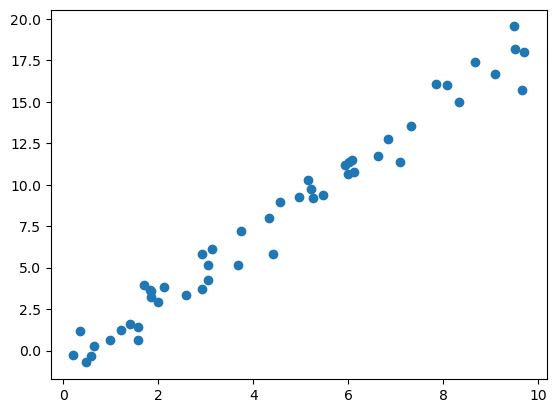

In [19]:
# testing some linear regression with scikit

# loading some random data from jake

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

rng = np.random.RandomState(42)
x = 10 * rng.rand(50)
y = 2 * x - 1 + rng.randn(50)
plt.scatter(x, y);

In [20]:
# first we choose and import the model

from sklearn.linear_model import LinearRegression

In [21]:
# choosing a class of model is NOT the same as an instance of the model
# next we need to define the hyperparameters

model = LinearRegression(fit_intercept=True)
model

LinearRegression()

In [23]:
# similar to keras, we've loaded the model but we haven't done anything with it yet.

# next we need to "massage" the data a little, since scikit is expecting 2d feature data for X (y is already 1d right now which scikit is expecting)
X = x[:, np.newaxis]
X.ndim

2

In [24]:
# looks good, now it's time to fit the model

model.fit(X, y) # this turns out to be hilariously easy, though i'm prepared to eat this comment later

LinearRegression()

In [26]:
# model parameters are stored as functions too

print(model.coef_)  # represents the slope of the simple linear fit of the data
print(model.intercept_) # " intercept

[1.9776566]
-0.9033107255311146


In [27]:
## Predicting labels for unknown data

# so the model is fit, let's give it some data it hasn't seen yet and ask it to make some predictions

xfit = np.linspace(-1, 11)  # making some new data

Xfit = xfit[:, np.newaxis]

yfit = model.predict(Xfit)

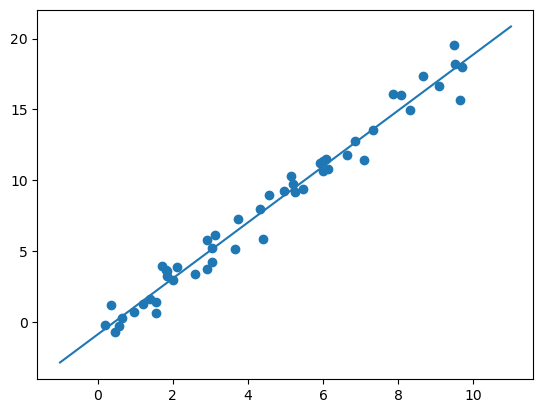

In [28]:
# finally, let's plot this

plt.scatter(x,y)
plt.plot(xfit, yfit)